In [1]:
import numpy as np 
import pandas as pd 
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
# Loading and preprocessing the image data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [5]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0) 
X_train[0].min(), X_train[0].max() 

(0.0, 1.0)

C:\Users\Mule\AppData\Local\Temp/ipykernel_18104/4119941473.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 10))


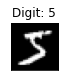

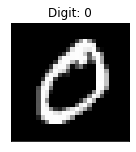

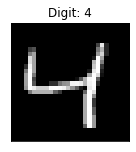

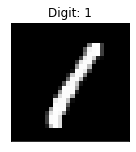

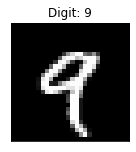

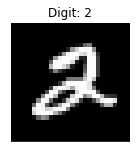

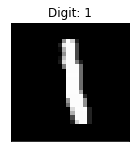

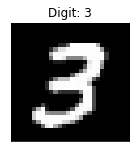

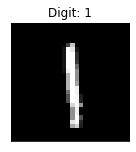

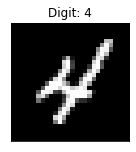

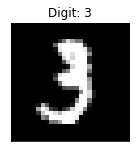

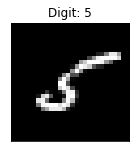

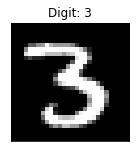

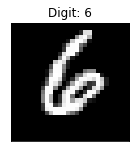

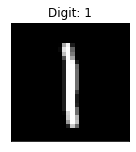

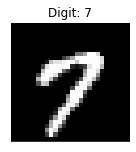

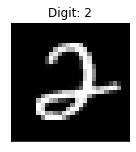

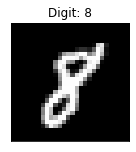

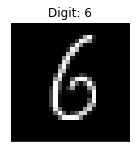

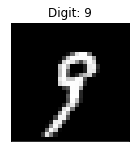

<Figure size 1152x720 with 0 Axes>

In [8]:
def plot_digit(image, digit, plt, i): 
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray')) 
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([]) 
 plt.figure(figsize=(16, 10)) 
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i) 
plt.show()

In [9]:
X_train = X_train.reshape((X_train.shape + (1,))) 
X_test = X_test.reshape((X_test.shape + (1,)))

In [10]:
y_train[0:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [11]:
# Defining the model's architecture
model = Sequential([
Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
MaxPooling2D((2, 2)), Flatten(),
Dense(100, activation="relu"), Dense(10, activation="softmax")
])

In [12]:
optimizer = SGD(learning_rate=0.01, momentum=0.9) 
model.compile(
 optimizer=optimizer, 
 loss="sparse_categorical_crossentropy", 
 metrics=["accuracy"]
)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [15]:
#Training and testing the model
Model_log=model.fit(X_train, y_train, epochs=10, batch_size=15, verbose=1,validation_data=0);

Epoch 1/10
4000/4000 [==============================] - 34s 8ms/step - loss: 0.1792 - accuracy: 0.9451
Epoch 2/10
4000/4000 [==============================] - 27s 7ms/step - loss: 0.0571 - accuracy: 0.9826
Epoch 3/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0356 - accuracy: 0.9890
Epoch 4/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 5/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0172 - accuracy: 0.9943
Epoch 6/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0120 - accuracy: 0.9963
Epoch 7/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0072 - accuracy: 0.9976
Epoch 8/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0061 - accuracy: 0.9982
Epoch 9/10
4000/4000 [==============================] - 17s 4ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 10/10
4000/4000 [==============================] - 18s 5ms/step - l

1/1 [==============================] - 0s 16ms/step


C:\Users\Mule\AppData\Local\Temp/ipykernel_18104/4119941473.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 10))


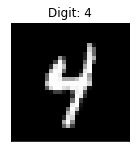

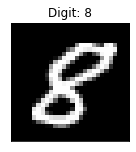

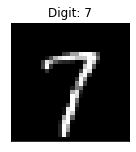

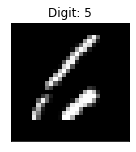

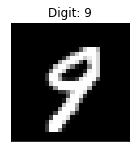

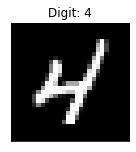

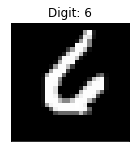

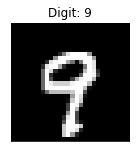

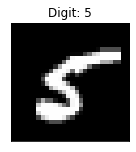

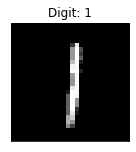

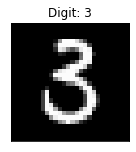

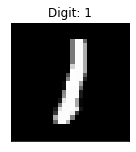

<Figure size 1152x720 with 0 Axes>

In [16]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1) 
 plot_digit(image, digit, plt, i)
plt.show()

In [17]:
predictions = np.argmax(model.predict(X_test), axis=-1) 
accuracy_score(y_test, predictions)

313/313 [==============================] - 1s 2ms/step


0.9881

In [18]:
n=random.randint(0,9999) 
plt.imshow(X_test[n]) 
plt.show()

In [19]:
predicted_value=model.predict(X_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is= 1


In [20]:
# Estimating the model's performance
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04198971018195152
Test accuracy: 0.988099992275238
